In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

In [2]:
dataset = pd.read_csv('Classification Data.csv')

In [3]:
dataset.shape

(4521, 17)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4521 non-null   int64 
 1   job          4521 non-null   object
 2   marital      4521 non-null   object
 3   education    4521 non-null   object
 4   default      4521 non-null   object
 5   balance      4521 non-null   int64 
 6   housing      4521 non-null   object
 7   loan         4521 non-null   object
 8   contact      4521 non-null   object
 9   day          4521 non-null   int64 
 10  month        4521 non-null   object
 11  duration     4521 non-null   int64 
 12  campaign     4521 non-null   int64 
 13  pdays        4521 non-null   int64 
 14  previous     4521 non-null   int64 
 15  poutcome     4521 non-null   object
 16  y            4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
dataset.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [51]:
dataset = dataset.rename(columns={'y': 'Subscription_Status'})

In [53]:
print(dataset.dtypes)

age                      int64
job                    float64
marital                float64
education              float64
default                float64
balance                  int64
housing                float64
loan                   float64
contact                float64
day                      int64
month                  float64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
poutcome               float64
Subscription_Status    float64
dtype: object


In [55]:
# Get categorical columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index([], dtype='object')


In [10]:
from sklearn import preprocessing


In [11]:
enc = preprocessing.OrdinalEncoder()


In [57]:
dataset['job'] = enc.fit_transform(dataset['job'].values.reshape(-1,1))
dataset['marital'] = enc.fit_transform(dataset['marital'].values.reshape(-1,1))
dataset['education'] = enc.fit_transform(dataset['education'].values.reshape(-1,1))
dataset['default'] = enc.fit_transform(dataset['default'].values.reshape(-1,1))
dataset['housing'] = enc.fit_transform(dataset['housing'].values.reshape(-1,1))
dataset['loan'] = enc.fit_transform(dataset['loan'].values.reshape(-1,1))
dataset['contact'] = enc.fit_transform(dataset['contact'].values.reshape(-1,1))
dataset['month'] = enc.fit_transform(dataset['month'].values.reshape(-1,1))
dataset['poutcome'] = enc.fit_transform(dataset['poutcome'].values.reshape(-1,1))
dataset['Subscription_Status'] = enc.fit_transform(dataset['Subscription_Status'].values.reshape(-1,1))


In [59]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription_Status
0,30,10.0,1.0,0.0,0.0,1787,0.0,0.0,0.0,19,10.0,79,1,-1,0,3.0,0.0
1,33,7.0,1.0,1.0,0.0,4789,1.0,1.0,0.0,11,8.0,220,1,339,4,0.0,0.0
2,35,4.0,2.0,2.0,0.0,1350,1.0,0.0,0.0,16,0.0,185,1,330,1,0.0,0.0
3,30,4.0,1.0,2.0,0.0,1476,1.0,1.0,2.0,3,6.0,199,4,-1,0,3.0,0.0
4,59,1.0,1.0,1.0,0.0,0,1.0,0.0,2.0,5,8.0,226,1,-1,0,3.0,0.0


In [61]:
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index([], dtype='object')


In [63]:
#class imbalance
dataset['Subscription_Status'].value_counts()

Subscription_Status
0.0    4000
1.0     521
Name: count, dtype: int64

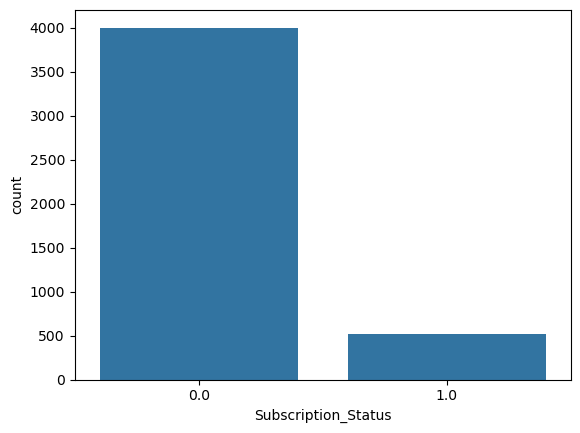

In [65]:
sns.countplot(dataset, x="Subscription_Status") 
plt.show() 

In [67]:
X = dataset.iloc[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]] . values
y = dataset.iloc[: , [16]] . values

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.3 ,random_state = 0)


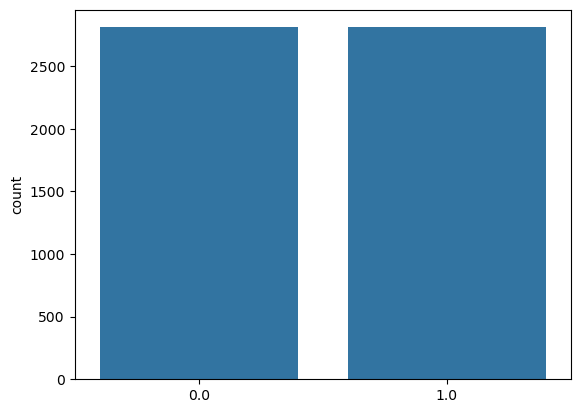

In [71]:
#for class imbalane
from imblearn.over_sampling import RandomOverSampler 
resampler=RandomOverSampler(random_state=0) 
X_train_oversampled,y_train_oversampled=resampler.fit_resample(X_train,y_train) 
sns.countplot(x=y_train_oversampled) 
plt.show() 

In [73]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold selector with threshold set to 0
variance_selector = VarianceThreshold(threshold=0)

# Apply fit_transform on the training set and transform on the test set
X_train_fs = variance_selector.fit_transform(X_train_oversampled)
X_test_fs = variance_selector.transform(X_test)

# Corrected print statement
print(f"{X_train.shape[1] - X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")


0 features have been removed, 16 features remain


In [75]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_oversampled,y_train_oversampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [77]:
y_pred = classifier.predict(X_test) #No scaling 
print(y_pred)

[0. 0. 1. ... 0. 0. 0.]


In [88]:
print("Real Labels: ", y_test)
print("Predicted Labels: ", y_pred)

Real Labels:  [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Labels:  [0. 0. 1. ... 0. 0. 0.]


In [96]:
from sklearn import metrics

# Predict the labels for the test set
y_pred = classifier.predict(X_test)  # Use the standardized test set

# Calculate accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (acc * 100))  # Display accuracy as a percentage

# Generate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('---------------------------')

# Generate classification report
result = metrics.classification_report(y_test, y_pred)
print('Classification Report for Decision Tree:')
print(result)

Accuracy: 85.63
Confusion Matrix:
[[1098   92]
 [ 103   64]]
---------------------------
Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      1190
         1.0       0.41      0.38      0.40       167

    accuracy                           0.86      1357
   macro avg       0.66      0.65      0.66      1357
weighted avg       0.85      0.86      0.85      1357



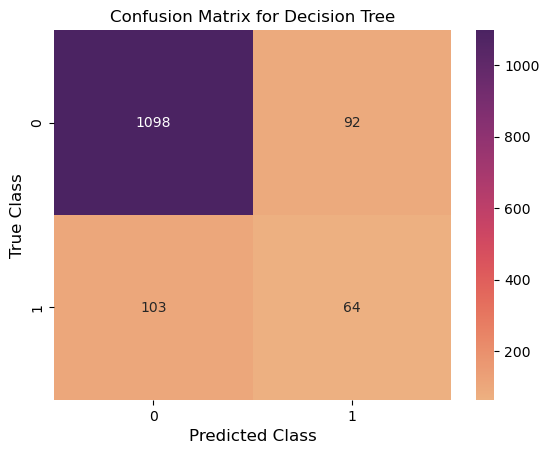

In [98]:
# Create the heatmap
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

# Add labels and title
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix for Decision Tree", fontsize=12)

# Show the plot
plt.show()



In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=0)

baseline_accuracy = cross_val_score(dt, X_train_oversampled, y_train_oversampled, cv=5).mean()

feature_importance = {}

# Loop over each feature and remove it to see the impact on accuracy
for i in range(X_train_oversampled.shape[1]):  # Loop through each column (feature)
    # Remove one feature
    X_train_reduced = np.delete(X_train_oversampled, i, axis=1)
    score = cross_val_score(dt, X_train_reduced, y_train_oversampled, cv=5).mean()
    feature_importance[f"Feature_{i+1}"] = baseline_accuracy - score  # Impact on accuracy

sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted features by impact on accuracy
for feature, impact in sorted_feature_importance:
    print(f"Feature: {feature}, Impact on Accuracy: {impact:.4f}")


Feature: Feature_12, Impact on Accuracy: 0.0133
Feature: Feature_11, Impact on Accuracy: 0.0037
Feature: Feature_16, Impact on Accuracy: 0.0028
Feature: Feature_1, Impact on Accuracy: 0.0025
Feature: Feature_7, Impact on Accuracy: 0.0025
Feature: Feature_10, Impact on Accuracy: 0.0023
Feature: Feature_2, Impact on Accuracy: 0.0021
Feature: Feature_8, Impact on Accuracy: 0.0021
Feature: Feature_15, Impact on Accuracy: 0.0020
Feature: Feature_4, Impact on Accuracy: 0.0020
Feature: Feature_13, Impact on Accuracy: 0.0011
Feature: Feature_5, Impact on Accuracy: 0.0004
Feature: Feature_6, Impact on Accuracy: 0.0002
Feature: Feature_14, Impact on Accuracy: 0.0000
Feature: Feature_9, Impact on Accuracy: -0.0002
Feature: Feature_3, Impact on Accuracy: -0.0012
